## Advanced predictions, data and plotting
``NBNode`` can leverage its ``.data`` attribute for prediction and plotting. 

#### Predict based on node names
Sometimes it might be usefull to identify the node corresponding to its name. Usually, try to set your name such that it matches ``NBNode.get_name_full()``, but it might be of convenience. 

In [1]:
import nbnode.nbnode_trees as nbtree
mytree = nbtree.tree_simple()
mytree.pretty_print()

print(mytree.prediction_str("/a"))
print(mytree.prediction_str("/a/a0"))
print(mytree.prediction_str("/a/a1"))
# In this case, probably better: 
print(mytree["/a"])
print(mytree["/a/a0"])
print(mytree["/a/a1"])


# It becomes interesting when the splits are different or the root node is missing: 
print(mytree.prediction_str("/a/a1/a1a"))
print(mytree["/a/a1/a1a"])

print("\nMissing root")
print(mytree.prediction_str("a/a1/a1a"))
print(mytree["a/a1/a1a"])

print("\nDifferent split")
print(mytree.prediction_str(":a:a1:a1a", split=":"))
print(mytree[":a:a1:a1a"])



a (counter:0)
├── a0 (counter:0)
├── a1 (counter:0)
│   └── a1a (counter:0)
└── a2 (counter:0)
NBNode('/a', counter=0, decision_name=None, decision_value=None)
NBNode('/a/a0', counter=0, decision_name='m1', decision_value=-1)
NBNode('/a/a1', counter=0, decision_name='m1', decision_value=1)
NBNode('/a', counter=0, decision_name=None, decision_value=None)
NBNode('/a/a0', counter=0, decision_name='m1', decision_value=-1)
NBNode('/a/a1', counter=0, decision_name='m1', decision_value=1)
NBNode('/a/a1/a1a', counter=0, decision_name='m2', decision_value='test')
NBNode('/a/a1/a1a', counter=0, decision_name='m2', decision_value='test')

Missing root
NBNode('/a/a1/a1a', counter=0, decision_name='m2', decision_value='test')
None

Different split
NBNode('/a/a1/a1a', counter=0, decision_name='m2', decision_value='test')
None


#### Usage of .data 
The ``.data`` is quite powerfull for further predictions, math and plotting. 


In [2]:
import os
import re
import pandas as pd

print(os.getcwd())
cellmat = pd.read_csv(
    os.path.join(
        os.pardir, os.pardir, "tests", "testdata", "flowcytometry", "gated_cells", "cellmat.csv"
    )
)
# FS TOF (against FS INT which is "FS")
cellmat.rename(columns={"FS_TOF": "FS.0"}, inplace=True)
cellmat.columns = [re.sub("_.*", "", x) for x in cellmat.columns]
print(cellmat)

/home/gugl/clonedgit/ccc_verse/nbnode/docs/notebooks
         FS  FS.0      SS  CD45RA  CCR7  CD28   PD1  CD27   CD4   CD8   CD3   
0    197657    94  186372    3.90  6.34  4.97 -1.98  7.51  5.87  3.55  5.83  \
1    180716    92  135447    6.48  6.63  5.17  3.07  7.38  5.49  2.64  5.83   
2    134129    90  168268    5.92  6.53  5.39  2.60  7.57  5.70  2.54  5.74   
3    239241    94   79262    5.47  6.57  4.68  3.30  7.36  5.75  2.76  6.06   
4    246527    89   97635    6.12  6.26  5.22  3.05  7.40  5.70  2.66  6.29   
..      ...   ...     ...     ...   ...   ...   ...   ...   ...   ...   ...   
994  176236    90  149982    6.48 -1.11  2.85 -1.55  2.28  0.59  1.70  0.39   
995  191863    99  115406    6.30  5.19  3.01  2.07 -1.58  0.62  1.02  0.73   
996  217752    93  124675    6.35  4.75  0.42  1.89  2.02  0.52  1.48  0.53   
997  334174    97  210458    1.90  1.36  1.22  2.52 -0.72  0.59  1.03  0.75   
998  308089   103  219747    6.48 -0.42  1.23  2.64  7.07  0.57  1.82  1.72   

In [3]:
import nbnode.nbnode_trees as nbtree

cell_tree = nbtree.tree_complete_aligned_trunk()
cell_tree.data = cellmat
# When setting .data, we do not need to give the cellmat explicitely to .predict()
cell_tree.id_preds(cell_tree.predict())
cell_tree.count(use_ids=True)
cell_tree.pretty_print()


AllCells (counter:999)
├── DN (counter:0)
├── DP (counter:973)
├── CD4-/CD8+ (counter:5)
│   ├── naive (counter:5)
│   ├── Tcm (counter:0)
│   ├── Temra (counter:0)
│   └── Tem (counter:0)
└── CD4+/CD8- (counter:21)
    ├── naive (counter:20)
    ├── Tcm (counter:0)
    ├── Temra (counter:1)
    └── Tem (counter:0)


/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(


Accessing any node's data is easy and is built on ``rootnode._data`` and ``node.ids`` such that every ``node.data := root._data.iloc[self.ids, :]``.

In [4]:
print(cell_tree.data.iloc[0:3, :])
print(cell_tree.data.shape)


print(cell_tree["/AllCells/CD4+/CD8-"].data.iloc[0:3, :])
print(cell_tree["/AllCells/CD4+/CD8-"].data.shape)

       FS  FS.0      SS  CD45RA  CCR7  CD28   PD1  CD27   CD4   CD8   CD3   
0  197657    94  186372    3.90  6.34  4.97 -1.98  7.51  5.87  3.55  5.83  \
1  180716    92  135447    6.48  6.63  5.17  3.07  7.38  5.49  2.64  5.83   
2  134129    90  168268    5.92  6.53  5.39  2.60  7.57  5.70  2.54  5.74   

   CD57  CD45  
0  2.62  6.78  
1  2.39  6.76  
2  1.02  6.46  
(999, 13)
        FS  FS.0      SS  CD45RA  CCR7  CD28   PD1  CD27   CD4   CD8   CD3   
17  184334   107  210764    2.88  6.38  6.11  4.13  7.91  6.00 -2.65  6.15  \
25  173701   105  235028    1.81  5.53  6.40  3.83  7.28  6.01 -0.56  5.72   
45  224976   101  162302    1.50  1.36  6.21  3.49  3.56  6.17 -3.40  5.37   

    CD57  CD45  
17  2.51  6.82  
25  2.66  6.80  
45  1.90  6.30  
(21, 13)


Now we can use the data and ``apply`` a function to it. Using it directly returns a dictionary of every node and the applied function: ``Dict[NBNode, Any]``. 

In [5]:
# calculate the sum of all cells per column
def col_sum(df: pd.DataFrame):
    return df.apply(sum, axis=0)


# There are 13 nodes in that tree, therefore apply returns a DICTIONARY of 13 elements
print(len(cell_tree.apply(fun=col_sum)))
print("\n\n\n")
print(cell_tree.apply(fun=col_sum))

13




{NBNode('/AllCells', counter=999, decision_name=None, decision_value=None): FS        4.463310e+08
FS.0      1.077770e+05
SS        7.552312e+08
CD45RA    2.627850e+03
CCR7      2.423360e+03
CD28      2.544160e+03
PD1       2.563000e+03
CD27      2.087390e+03
CD4       1.559720e+03
CD8       2.202570e+03
CD3       1.274720e+03
CD57      3.276380e+03
CD45      5.539190e+03
dtype: float64, NBNode('/AllCells/DN', counter=0, decision_name=['CD4', 'CD8'], decision_value=[-1, -1]): FS        0
FS.0      0
SS        0
CD45RA    0
CCR7      0
CD28      0
PD1       0
CD27      0
CD4       0
CD8       0
CD3       0
CD57      0
CD45      0
dtype: int64, NBNode('/AllCells/DP', counter=973, decision_name=['CD4', 'CD8'], decision_value=[1, 1]): FS        4.381676e+08
FS.0      1.050100e+05
SS        7.451190e+08
CD45RA    2.549230e+03
CCR7      2.365810e+03
CD28      2.479180e+03
PD1       2.469230e+03
CD27      2.012120e+03
CD4       1.475720e+03
CD8       2.203020e+03
CD3       1.220460e+03

/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a n

But it is probably often more useful to directly set a (new) attribute of each node to the result!


In [6]:
# calculate the sum of all cells per column
def col_sum(df: pd.DataFrame):
    return df.apply(sum, axis=0)


print("\n\n\n")
res = cell_tree.apply(fun=col_sum, result_attribute_name="col_sum")
print(res is None)
print(cell_tree.col_sum)





True
FS        4.463310e+08
FS.0      1.077770e+05
SS        7.552312e+08
CD45RA    2.627850e+03
CCR7      2.423360e+03
CD28      2.544160e+03
PD1       2.563000e+03
CD27      2.087390e+03
CD4       1.559720e+03
CD8       2.202570e+03
CD3       1.274720e+03
CD57      3.276380e+03
CD45      5.539190e+03
dtype: float64


/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a n

We also introduce a convenience wrapper: ``per_node_data_fun``. 
It first transforms the data as ``datatable.Frame``, then potentially restricts the data to a subset of columns and finally applies attributes (functions!) of [datatable.Frame](https://datatable.readthedocs.io/en/latest/api/frame.html). Additionally we created a function to calculate the covariance matrix (based on datatable). 

In [7]:
from nbnode.nbnode_util import per_node_data_fun

print("\n\n\n")
cell_tree.apply(
    lambda x: per_node_data_fun(x=x, fun_name="mean"),
    result_attribute_name="mean",
)
print(cell_tree.mean)
print("\n\n")
cell_tree.apply(
    lambda x: per_node_data_fun(x=x, fun_name="cov"),
    result_attribute_name="cov",
)
print("\n\n")
cell_tree.cov






              FS        FS.0             SS   CD45RA      CCR7      CD28   
0  446777.783784  107.884885  755987.182182  2.63048  2.425786  2.546707  \

        PD1      CD27       CD4       CD8       CD3     CD57      CD45  
0  2.565566  2.089479  1.561281  2.204775  1.275996  3.27966  5.544735  








/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(
/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a n

,FS,FS.0,SS,CD45RA,CCR7,CD28,PD1,CD27,CD4,CD8,CD3,CD57,CD45
FS,2.165583e+10,6.147502e+05,3.620725e+10,-39147.927371,-14758.007195,2558.966552,11245.428569,-82448.944161,-83005.474472,-33479.754087,-103486.452630,5706.132441,-26665.567051
FS.0,6.147502e+05,1.254948e+02,1.563292e+06,-0.995866,-0.464734,-0.241061,1.563517,-3.511773,-2.612908,-1.555762,-5.162145,0.418738,-0.143062
SS,3.620725e+10,1.563292e+06,1.060875e+11,-126466.386170,-36703.726977,10494.293897,20883.824316,-232079.856598,-223074.687248,-114591.527895,-284654.480683,-20623.042663,-101119.493078
CD45RA,-3.914793e+04,-9.958665e-01,-1.264664e+05,1.377467,0.424056,-0.225620,-0.058146,0.531804,0.254024,0.488336,0.467378,0.423125,0.483976
CCR7,-1.475801e+04,-4.647341e-01,-3.670373e+04,0.424056,1.235744,0.711549,0.153438,1.180837,0.571201,0.342640,0.772448,-0.124259,0.239509
CD28,2.558967e+03,-2.410609e-01,1.049429e+04,-0.225620,0.711549,1.896833,0.177192,1.152222,0.648468,0.054631,0.807809,-0.530344,0.117106
PD1,1.124543e+04,1.563517e+00,2.088382e+04,-0.058146,0.153438,0.177192,1.161104,0.027818,0.205716,-0.008117,0.141911,0.209764,0.143325
CD27,-8.244894e+04,-3.511773e+00,-2.320799e+05,0.531804,1.180837,1.152222,0.027818,3.862032,1.129160,1.014295,1.892278,-0.049220,0.553066
CD4,-8.300547e+04,-2.612908e+00,-2.230747e+05,0.254024,0.571201,0.648468,0.205716,1.129160,1.703458,-0.054002,1.091317,-0.102284,0.512471
CD8,-3.347975e+04,-1.555762e+00,-1.145915e+05,0.488336,0.342640,0.054631,-0.008117,1.014295,-0.054002,2.119584,1.205916,0.385426,0.343696


Importantly, the apply function is done on all nodes separately, therefore also the result_attribute_name is set for each node separately!

In [8]:

cell_tree.pretty_print()
cell_tree["/AllCells/CD4+/CD8-"].cov


AllCells (counter:999)
├── DN (counter:0)
├── DP (counter:973)
├── CD4-/CD8+ (counter:5)
│   ├── naive (counter:5)
│   ├── Tcm (counter:0)
│   ├── Temra (counter:0)
│   └── Tem (counter:0)
└── CD4+/CD8- (counter:21)
    ├── naive (counter:20)
    ├── Tcm (counter:0)
    ├── Temra (counter:1)
    └── Tem (counter:0)


,FS,FS.0,SS,CD45RA,CCR7,CD28,PD1,CD27,CD4,CD8,CD3,CD57,CD45
FS,8.579379e+09,-70918.9500,1.983754e+10,55738.251286,-47391.339857,-70431.262810,62951.568762,-105445.765952,-108395.155929,-5903.629738,-168594.759857,76528.430143,-23592.250929
FS.0,-7.091895e+04,161.5000,6.775819e+05,4.836000,0.256000,-5.529000,5.402000,-13.373000,-2.360500,-0.549000,-8.939000,2.551000,0.333000
SS,1.983754e+10,677581.9500,7.257807e+10,78956.079500,7015.310000,-61653.769333,381992.605667,-65083.371833,-297815.850500,-87121.889333,-440940.419500,283685.350500,-83679.807500
CD45RA,5.573825e+04,4.8360,7.895608e+04,1.984566,-0.231057,-0.625068,0.014314,-1.343086,-0.634414,-0.121121,-1.264832,0.641103,0.006621
CCR7,-4.739134e+04,0.2560,7.015310e+03,-0.231057,2.119731,1.837819,1.227909,2.731482,0.721181,-0.526321,1.609736,0.085096,0.045586
CD28,-7.043126e+04,-5.5290,-6.165377e+04,-0.625068,1.837819,4.233845,1.408394,4.528386,1.430229,-1.169376,3.352144,-0.117211,-0.155401
PD1,6.295157e+04,5.4020,3.819926e+05,0.014314,1.227909,1.408394,4.538896,1.954455,-1.065938,-1.859649,-1.890051,2.319644,-0.639173
CD27,-1.054458e+05,-13.3730,-6.508337e+04,-1.343086,2.731482,4.528386,1.954455,8.181249,1.576484,-1.738945,3.635942,0.463187,-0.032486
CD4,-1.083952e+05,-2.3605,-2.978159e+05,-0.634414,0.721181,1.430229,-1.065938,1.576484,1.823103,0.092512,2.923721,-1.296814,0.386778
CD8,-5.903630e+03,-0.5490,-8.712189e+04,-0.121121,-0.526321,-1.169376,-1.859649,-1.738945,0.092512,1.651106,0.266684,-1.010761,0.280202


Finally, ``apply()`` does not need to use ``.data`` but can use any attribute present on all nodes. 

In [9]:
import nbnode.nbnode_trees as nbtree

cell_tree = nbtree.tree_complete_aligned_trunk()
cell_tree.data = cellmat
# When setting .data, we do not need to give the cellmat explicitely to .predict()
cell_tree.id_preds(cell_tree.predict())
cell_tree.count(use_ids=True)
for x in cell_tree.__dict__.keys():
    print(x)
print("\n\n")


name
_NodeMixin__children
decision_name
decision_value
decision_cutoff
counter
ids
_data
id_unique_dot_exporter
math_node_attribute
math_inplace
_long_print_attributes





/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.
  warnings.warn(


In [10]:
try: 
    print(cell_tree.changed_decision_name)
except AttributeError as e:
    print("AttributeError: 'NBNode' object has no attribute 'changed_decision_name'")
cell_tree.apply(lambda x: x[0] + "___this_is_a_change" if x is not None else x, input_attribute_name="decision_name", result_attribute_name="changed_decision_name")
cell_tree.pretty_print(print_attributes=["decision_name", "changed_decision_name"])

AttributeError: 'NBNode' object has no attribute 'changed_decision_name'
AllCells (decision_name:None, changed_decision_name:None)
├── DN (decision_name:['CD4', 'CD8'], changed_decision_name:CD4___this_is_a_change)
├── DP (decision_name:['CD4', 'CD8'], changed_decision_name:CD4___this_is_a_change)
├── CD4-/CD8+ (decision_name:['CD4', 'CD8'], changed_decision_name:CD4___this_is_a_change)
│   ├── naive (decision_name:['CCR7', 'CD45RA'], changed_decision_name:CCR7___this_is_a_change)
│   ├── Tcm (decision_name:['CCR7', 'CD45RA'], changed_decision_name:CCR7___this_is_a_change)
│   ├── Temra (decision_name:['CCR7', 'CD45RA'], changed_decision_name:CCR7___this_is_a_change)
│   └── Tem (decision_name:['CCR7', 'CD45RA'], changed_decision_name:CCR7___this_is_a_change)
└── CD4+/CD8- (decision_name:['CD4', 'CD8'], changed_decision_name:CD4___this_is_a_change)
    ├── naive (decision_name:['CCR7', 'CD45RA'], changed_decision_name:CCR7___this_is_a_change)
    ├── Tcm (decision_name:['CCR7', 'CD45RA

#### Plotting

For plotting we have two major steps: 

1. Generate a [``.dot``](https://graphviz.org/doc/info/lang.html) file with [anytree](https://anytree.readthedocs.io/en/latest/exporter/dotexporter.html)
2. Use [``graphviz``](https://graphviz.org/download/) as engine to make the plots

Potentially you have to install graphviz. 

In [11]:
import nbnode.nbnode_trees as nbtree

cell_tree = nbtree.tree_complete_aligned_trunk()
exported_dot = cell_tree.export_dot()
print(exported_dot)

digraph tree {
    node [shape=box, style="filled", color="black"];
    "0x7f6217352b80" [label="None", fillcolor="white"];
    "0x7f628c31cfa0" [label="None", fillcolor="white"];
    "0x7f628c31c9d0" [label="None", fillcolor="white"];
    "0x7f628c31cb20" [label="None", fillcolor="white"];
    "0x7f6217352670" [label="None", fillcolor="white"];
    "0x7f6217352730" [label="None", fillcolor="white"];
    "0x7f6217352610" [label="None", fillcolor="white"];
    "0x7f6217352820" [label="None", fillcolor="white"];
    "0x7f6217352d00" [label="None", fillcolor="white"];
    "0x7f6217352190" [label="None", fillcolor="white"];
    "0x7f6217352850" [label="None", fillcolor="white"];
    "0x7f62173528b0" [label="None", fillcolor="white"];
    "0x7f62173528e0" [label="None", fillcolor="white"];
    "0x7f6217352b80" -> "0x7f628c31cfa0";
    "0x7f6217352b80" -> "0x7f628c31c9d0";
    "0x7f6217352b80" -> "0x7f628c31cb20";
    "0x7f6217352b80" -> "0x7f6217352d00";
    "0x7f628c31cb20" -> "0x7f6217352

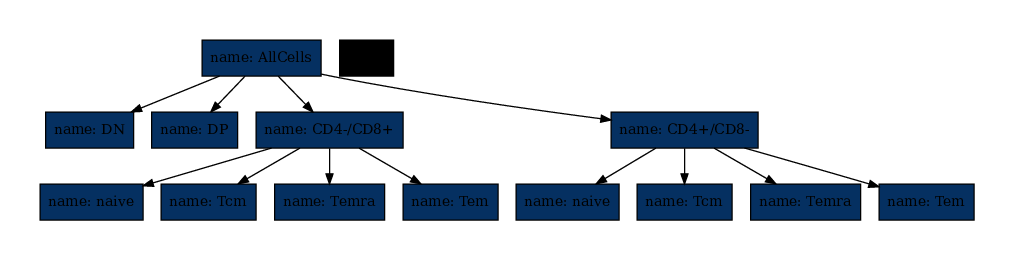

In [12]:
print(cell_tree.graph_from_dot())


from nbnode.plot.utils import plot_save_unified
plot_save_unified(cell_tree.graph_from_dot(), "cell_tree.pdf")

from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img


Classically, the colors visualize the number of cells in each node (``counter``). 
Up to this point we did not count, so let's do that. 

In [13]:

cell_tree.data = cellmat
# When setting .data, we do not need to give the cellmat explicitely to .predict()
cell_tree.id_preds(cell_tree.predict())
cell_tree.count(use_ids=True)
cell_tree.pretty_print()

AllCells (counter:999)
├── DN (counter:0)
├── DP (counter:973)
├── CD4-/CD8+ (counter:5)
│   ├── naive (counter:5)
│   ├── Tcm (counter:0)
│   ├── Temra (counter:0)
│   └── Tem (counter:0)
└── CD4+/CD8- (counter:21)
    ├── naive (counter:20)
    ├── Tcm (counter:0)
    ├── Temra (counter:1)
    └── Tem (counter:0)


/home/gugl/.conda_envs/nbnode_pyscaffold/lib/python3.8/site-packages/nbnode/nbnode.py:353: UserWarning: self.ids was an empty list, subset an empty dataframe. Did you call celltree.id_preds(predicted_nodes)? Can also be a node with no cells.


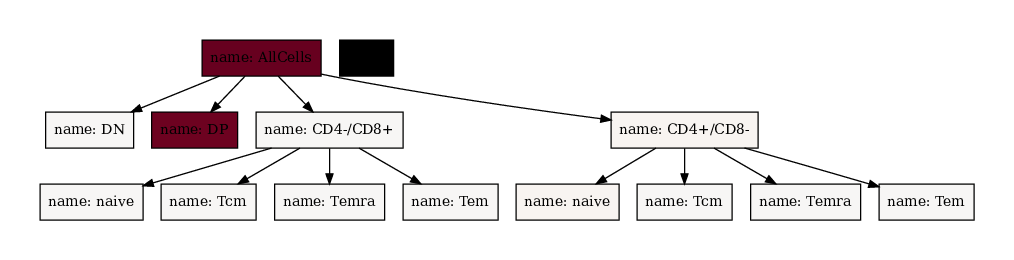

In [14]:
plot_save_unified(cell_tree.graph_from_dot(), "cell_tree.pdf")

from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img


All cells are in the root node (``/AllCells``), therefore it is deep red. Also there are so many ``DP`` cells that all other nodes are essentially white. Let's force maximum saturation (red) at value 50 and minimum saturation (white) at value 0!

AllCells (counter:999)
├── DN (counter:0)
├── DP (counter:973)
├── CD4-/CD8+ (counter:5)
│   ├── naive (counter:5)
│   ├── Tcm (counter:0)
│   ├── Temra (counter:0)
│   └── Tem (counter:0)
└── CD4+/CD8- (counter:21)
    ├── naive (counter:20)
    ├── Tcm (counter:0)
    ├── Temra (counter:1)
    └── Tem (counter:0)


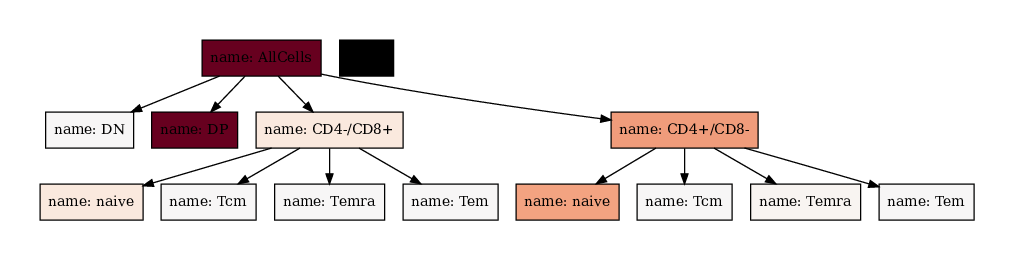

In [15]:
cell_tree.pretty_print()
plot_save_unified(
    cell_tree.graph_from_dot(
        fillcolor_node_attribute="counter",
        custom_min_max_dict={"min": 0, "max": 50},
    ),
    "cell_tree.pdf",
)

from wand.image import Image as WImage

img = WImage(filename="cell_tree.pdf")
img


We can also modify the text printed with the ``node_text_attributes`` argument. If only a list of elements is given, the result is always ``value_name:value``. To make more sophisticated formatting you can supply a ``Dict[str, str]`` which contains the attribute name as key and the [``f-string``](https://note.nkmk.me/en/python-f-strings/) as value. 

AllCells (counter:999)
├── DN (counter:0)
├── DP (counter:973)
├── CD4-/CD8+ (counter:5)
│   ├── naive (counter:5)
│   ├── Tcm (counter:0)
│   ├── Temra (counter:0)
│   └── Tem (counter:0)
└── CD4+/CD8- (counter:21)
    ├── naive (counter:20)
    ├── Tcm (counter:0)
    ├── Temra (counter:1)
    └── Tem (counter:0)


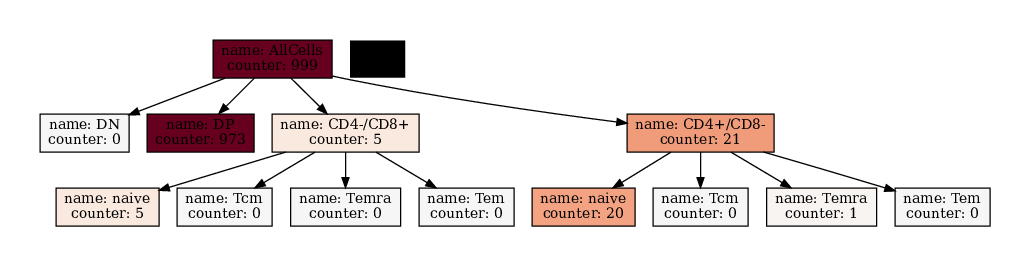

In [16]:
cell_tree.pretty_print()
plot_save_unified(
    cell_tree.graph_from_dot(
    fillcolor_node_attribute="counter", 
    custom_min_max_dict={"min": 0, "max": 50},
    node_text_attributes=["name", "counter"],
    ), 
    "cell_tree.pdf")

from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img

AllCells (counter:999)
├── DN (counter:0)
├── DP (counter:973)
├── CD4-/CD8+ (counter:5)
│   ├── naive (counter:5)
│   ├── Tcm (counter:0)
│   ├── Temra (counter:0)
│   └── Tem (counter:0)
└── CD4+/CD8- (counter:21)
    ├── naive (counter:20)
    ├── Tcm (counter:0)
    ├── Temra (counter:1)
    └── Tem (counter:0)


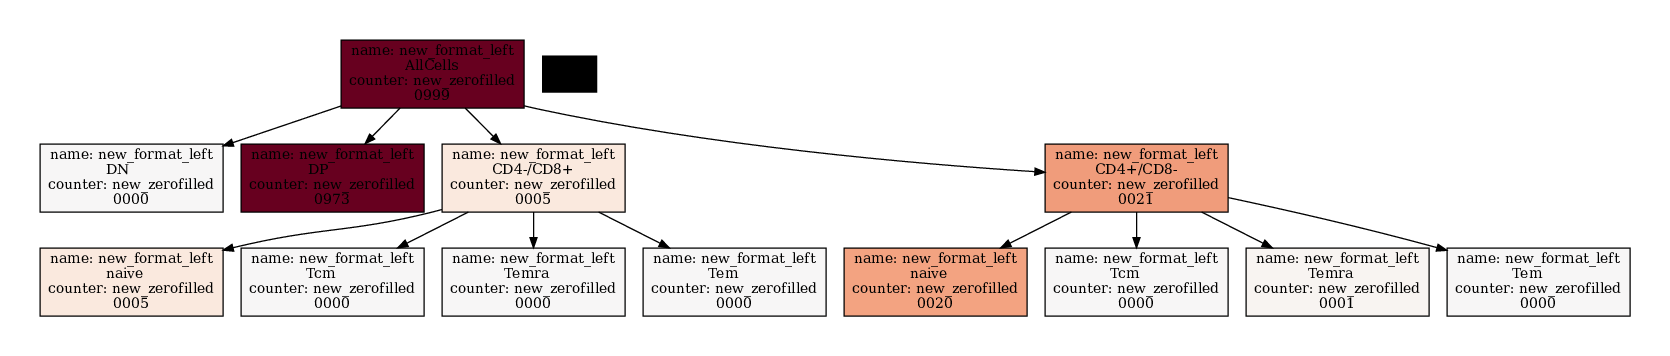

In [17]:
cell_tree.pretty_print()
plot_save_unified(
    cell_tree.graph_from_dot(
    fillcolor_node_attribute="counter", 
    custom_min_max_dict={"min": 0, "max": 50},
    node_text_attributes={"name":"new_format_left\n{:<8}", "counter":"new_zerofilled\n{:04d}"},
    ), 
    "cell_tree.pdf")

from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img

If you want to apply math to the nodes you have to do that outside. 

AllCells (counter:5713.223)
├── DN (counter:5.713223)
├── DP (counter:5564.679202)
├── CD4-/CD8+ (counter:34.279338)
│   ├── naive (counter:34.279338)
│   ├── Tcm (counter:5.713223)
│   ├── Temra (counter:5.713223)
│   └── Tem (counter:5.713223)
└── CD4+/CD8- (counter:125.690906)
    ├── naive (counter:119.977683)
    ├── Tcm (counter:5.713223)
    ├── Temra (counter:11.426446)
    └── Tem (counter:5.713223)


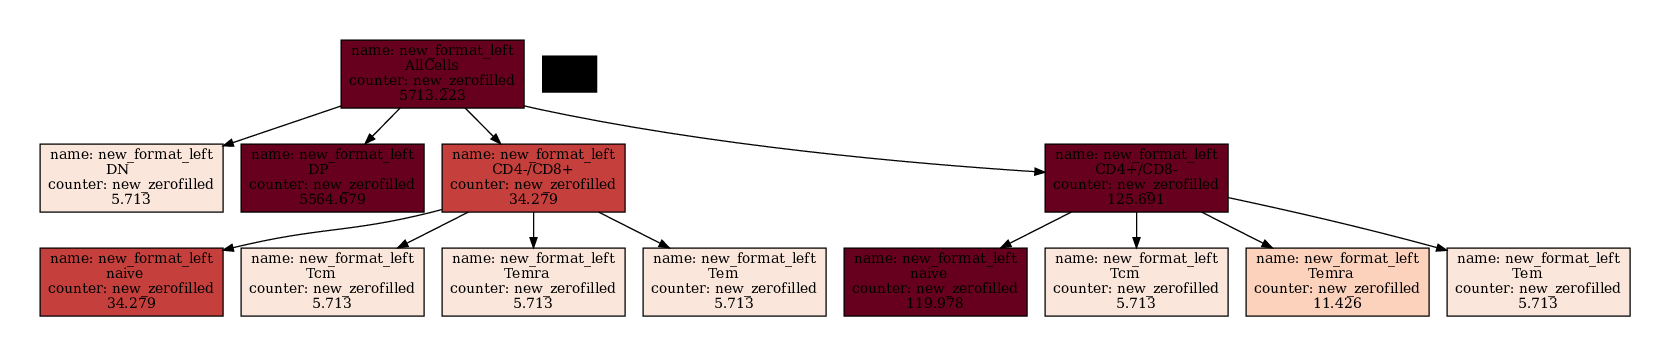

In [18]:
new_tree = (cell_tree + 1)
new_tree.astype_math_node_attribute(float)
new_tree = new_tree * 5.713223

new_tree.pretty_print()
plot_save_unified(
    new_tree.graph_from_dot(
    fillcolor_node_attribute="counter", 
    custom_min_max_dict={"min": 0, "max": 50},
    node_text_attributes={"name":"new_format_left\n{:<8}", "counter":"new_zerofilled\n{:.3f}"},
    ), 
    "cell_tree.pdf")

from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img

You can also change the color map also using matplotlibs color maps. 

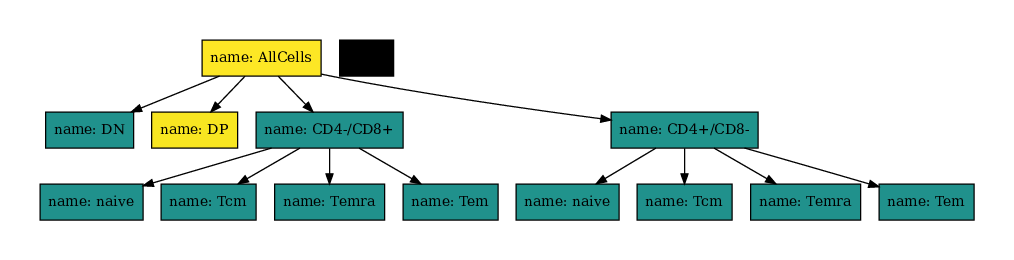

In [20]:
import matplotlib as mpl

plot_save_unified(
    new_tree.graph_from_dot(
        fillcolor_node_attribute="counter",
        cmap=mpl.colormaps.get_cmap("viridis"),
    ),
    "cell_tree.pdf",
)

from wand.image import Image as WImage

img = WImage(filename="cell_tree.pdf")
img


You can use usual ``pydotplus`` to make much more complex graphs:

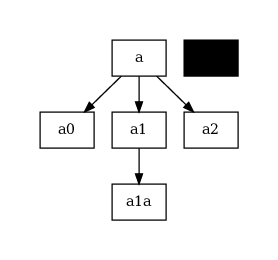

In [58]:
import pydotplus
import anytree.exporter as a_exp

from nbnode.plot.utils import plot_save_unified

simpletree = nbtree.tree_simple()
dot_data = a_exp.UniqueDotExporter(
    simpletree,
    options=['node [shape=box, style="filled", color="black"];'],
    nodeattrfunc=lambda node: 'label="{}", fillcolor="white"'.format(node.name),
)
dotdata_str = "\n".join([x for x in dot_data])
# print(dotdata_str)
graph: pydotplus.Dot = pydotplus.graph_from_dot_data(dotdata_str)
nodes = graph.get_node_list()

plot_save_unified(
    any_plot=graph, file="cell_tree.pdf"
)
from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img

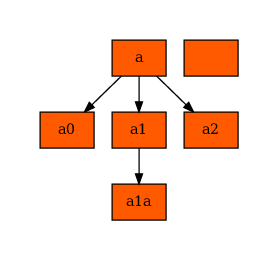

In [59]:
for node in nodes:
    if node.get_name() not in ("node", "edge", "plottitle"):
        node.set_fillcolor("#ff5a00")
# print(graph.to_string())
plot_save_unified(any_plot=graph, file="cell_tree.pdf")
from wand.image import Image as WImage
img = WImage(filename='cell_tree.pdf')
img
